In [36]:
import json
with open('../models/eps1_dropout_ECFP/aggregated_posterior.json', 'r') as f:
    data = json.load(f)

In [43]:
# draw 10000 random samples from the latent space

import numpy as np

mus = np.array(data['mean'])
stds = np.array(data['std'])

samples = np.random.normal(mus, stds, (10000, 32))

In [44]:
import pandas as pd

# calculate the norm of the samples

norms_random = np.linalg.norm(samples, axis=1)
random_df = pd.DataFrame(norms_random, columns=['norm'])
random_df['label'] = 'random'

# read the norms of bayesian search results

df = pd.read_csv('../results/latent_vectors_20241217_173316/latent_vectors.csv')
df = df[['norm']]
df['label'] = 'PROFIS'

plot_df = pd.concat([random_df, df])

In [45]:
df

,norm,label
0,33.432358,PROFIS
1,26.882786,PROFIS
2,26.018826,PROFIS
3,32.667935,PROFIS
4,30.179904,PROFIS
...,...,...
9995,31.064064,PROFIS
9996,32.946518,PROFIS
9997,21.174103,PROFIS
9998,31.564993,PROFIS


/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Axes: xlabel='norm', ylabel='Count'>

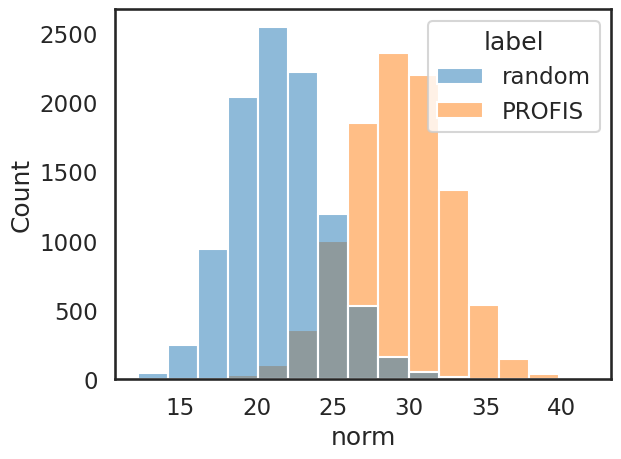

In [46]:
# plot histograms of the norms

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_context('talk')

sns.histplot(plot_df, x='norm', hue='label', bins=15, color='hotpink')

In [48]:
# from a list means and stds, construct a vector which has the largest possible norm, given that you can add or subtract 2 stds from the mean

vector = []
for mu, std in zip(mus, stds):
    if mu > 0:
        vector.append(mu+2*std)
    else:
        vector.append(mu-2*std)
vector = np.array(vector)

In [49]:
norm = np.linalg.norm(vector)

In [50]:
norm

45.335759865813905